# MOHAMED AMINE FAKHRE-EDDINE / FAHD CIHIBANI / WIAM EL HARRAK

# Ensemble de données pour la prédiction de l'insuffisance cardiaque

### **Contexte**
Les maladies cardiovasculaires (MCV) sont la première cause de décès dans le monde. On estime qu'elles font 17,9 millions de victimes chaque année, ce qui représente 31 % de l'ensemble des décès dans le monde. Quatre décès par MCV sur cinq sont dus à des crises cardiaques et à des accidents vasculaires cérébraux, et un tiers de ces décès surviennent prématurément chez des personnes âgées de moins de 70 ans. L'insuffisance cardiaque est un événement courant causé par les MCV et cet ensemble de données contient 11 caractéristiques qui peuvent être utilisées pour prédire une éventuelle maladie cardiaque.

Les personnes atteintes d'une maladie cardiovasculaire ou présentant un risque cardiovasculaire élevé (en raison de la présence d'un ou plusieurs facteurs de risque tels que l'hypertension, le diabète, l'hyperlipidémie ou une maladie déjà établie) ont besoin d'une détection et d'une prise en charge précoces, pour lesquelles un modèle d'apprentissage automatique peut être d'une grande utilité.

### **Informations sur les attributs**
**Âge :** âge du patient [années] \
**Sex :** sexe du patient [M : homme, F : femme]. \
**ChestPainType :** type de douleur thoracique [TA : angine typique, ATA : angine atypique, NAP : Douleur non angineuse, ASY : Asymptomatique] \
**RestingBP :** pression artérielle au repos [mm Hg] \
**Cholestérol :** cholestérol sérique [mm/dl] \
**FastingBS :** glycémie à jeun [1 : si FastingBS > 120 mg/dl, 0 : sinon] \
**RestingECG :** résultats de l'électrocardiogramme au repos [Normal : Normal, ST : anomalie de l'onde ST-T (inversion de l'onde T et/ou élévation ou dépression de l'onde ST de > 0,05 mV), LVH : hypertrophie ventriculaire gauche probable ou certaine selon les critères d'Estes]. \
**MaxHR :** fréquence cardiaque maximale atteinte [valeur numérique comprise entre 60 et 202]. \
**ExerciseAngina :** angor induit par l'exercice [Y : Oui, N : Non] \
**Oldpeak :** oldpeak = ST [Valeur numérique mesurée en dépression] \
**ST_Slope :** la pente du pic du segment ST à l'effort [Up : ascendant, Flat : plat, Down : descendant]. \
**HeartDisease :** classe de sortie [1 : maladie cardiaque, 0 : normal] 

Cet ensemble de données a été créé en combinant différents ensembles de données déjà disponibles indépendamment mais non combinés auparavant. Dans cet ensemble de données, 5 ensembles de données cardiaques sont combinés sur 11 caractéristiques communes, ce qui en fait le plus grand ensemble de données sur les maladies cardiaques disponible à ce jour à des fins de recherche. Les cinq ensembles de données utilisés pour sa curation sont les suivants :

**Cleveland :** 303 observations
**Hongrie :** 294 observations
**Suisse :** 123 observations
**Long Beach VA :** 200 observations
**Ensemble de données Stalog (cœur) :** 270 observations

Pour ce projet, nous allons utiliser l'algorithme XGBoost pour prédire la présence ou non d'une maladie cardiaque chez un patient.

XGBoost est utilisé pour les questions d'apprentissage supervisé dans lesquelles nous prédisons une variable cible $y_i$ en utilisant des données d'apprentissage $x_i$ (avec de nombreuses caractéristiques). Avant d'aborder les spécificités des arbres, passons en revue les principes fondamentaux de l'apprentissage supervisé.

Pour comprendre XGBoost, vous devez d'abord comprendre les idées et les méthodes d'apprentissage automatique sur lesquelles il est basé : l'apprentissage automatique supervisé, les arbres de décision, l'apprentissage d'ensemble et le gradient boosting.

Les concepts que nous allons aborder ici sont fondamentaux pour l'apprentissage supervisé et servent de blocs de construction naturels pour les boîtes à outils d'apprentissage automatique. Vous devriez être en mesure de définir les différences et les similitudes entre les arbres boostés par le gradient et les forêts aléatoires, par exemple. Comprendre le processus d'une manière formalisée nous aide également à comprendre l'objectif que nous apprenons ainsi que le raisonnement derrière les heuristiques telles que l'élagage et le lissage.

### **Modèle et paramètres**
Supervised learning refers to the mathematical framework used to form predictions from input data. A linear model is a popular example, with the prediction value being $\hat{y}_i = \sum_j \theta_j x_{ij}$. The prediction value can have various meanings, such as logistic conversion for positive class likelihood or ranking score for output ratings. Parameters, the unknowns learned from data, are the coefficients theta in linear regression issues. The description of parameters is sloppy due to the numerous parameters in a model.

### **Fonction objective : Perte d'entraînement + régularisation**
Les sélections prudentes de $y_i$ peuvent être utilisées pour des tâches telles que la régression, la classification et le classement. La formation d'un modèle implique de trouver les paramètres optimaux $\theta$ pour les données de formation $x_i$ et les étiquettes $y_i$. Pour former le modèle, une fonction objective est établie, qui mesure l'adéquation du modèle aux données d'apprentissage. Les fonctions objectives se composent d'une perte d'apprentissage et d'un terme de régularisation:

$\text{obj}(\theta) = L(\theta) + \Omega(\theta)$

où $L$ représente la fonction de perte d'apprentissage et $\Omega$ représente le terme de régularisation. La perte d'apprentissage quantifie le degré de prédiction de notre modèle par rapport aux données d'apprentissage. Une option populaire pour $L$ est l'erreur quadratique moyenne, qui est donnée par :

$L(\theta) = \sum_i (y_i-\hat{y}_i)^2$

Une autre fonction de perte couramment utilisée est la perte logistique, utilisée pour la régression logistique :

$L(\theta) = \sum_i[ y_i\ln (1+e^{-\hat{y}_i}) + (1-y_i)\ln (1+e^{\hat{y}_i})]$

L'expression "régularisation" est souvent négligée. Le terme de régularisation régule la complexité du modèle, ce qui permet d'éviter l'ajustement excessif.

### **Decision trees (arbres de decision)**
L’apprentissage de l’arbre des décisions est une méthode d’enseignement supervisé qui est utilisée dans les statistiques, l’exploitation minière de données et le machine learning . Il s’agit d’une approche non paramétrique qui peut être utilisée pour la classification ainsi que pour la régression. Le but de l'utilisation d'un arbre décisionnel est d'apprendre les règles de décision de base déduites des attributs de données pour produire un modèle de formation qui peut être utilisé pour prédire la classe ou la valeur de la variable cible.

### **Gradient Boosting Decision Trees (GBDT)**
Gradient Boosting Decision Trees (GBDT) sont une approche d'apprentissage d'ensemble d'arbres de décision pour la classification et la régression qui est comparable au Random forest. Pour créer un meilleur modèle, les techniques d'apprentissage d'ensemble mélangent différentes méthodes d'apprentissage automatique.

Random forest et le GBDT construisent tous deux un modèle à partir de plusieurs arbres de décision. La différence réside dans la manière dont les arbres sont construits et reliés.

Random forest construit des arbres de décision entiers en parallèle à l'aide d'échantillons bootstrap aléatoires de l'ensemble de données, selon un processus connu sous le nom de "bagging". La prévision finale est une moyenne pondérée de toutes les prédictions des arbres de décision. Mathématiquement, nous pouvons écrire notre modèle sous la forme suivante :

$\hat{y}_i = \sum_{k=1}^K f_k(x_i), f_k \in \mathcal{F}$

où $K$ est le nombre d'arbres, $f_k$ est une fonction dans l'espace fonctionnel $\mathcal{F}$, et $\mathcal{F}$ est l'ensemble de tous les CART possibles. La fonction objective à optimiser est donnée par la formule suivante:

$\text{obj}(\theta) = \sum_i^n l(y_i, \hat{y}_i) + \sum_{k=1}^K \omega(f_k)$

où $\omega(f_k)$ est la complexité de l'arbre $f_k$, définie en détail plus loin.

### **Tree Boosting**
L'expression "gradient boosting" est dérivée du concept de "boosting" ou d'amélioration d'un modèle faible unique en le fusionnant avec un certain nombre de modèles faibles supplémentaires pour former un modèle collectivement fort. Le "gradient boosting" est une extension du "boosting" dans laquelle le processus de production additive de modèles faibles est formalisé sous la forme d'un algorithme de descente de gradient sur une fonction objective. L'amplification par gradient cible les résultats du modèle suivant afin de réduire les erreurs. Les résultats ciblés pour chaque instance sont déterminés par le gradient de l'erreur par rapport à la prédiction (d'où le nom de "gradient boosting").

Les GBDT forment un ensemble d'arbres de décision peu profonds de manière répétée, chaque itération utilisant les résidus d'erreur du modèle précédent pour ajuster le modèle suivant. La prévision finale est la moyenne pondérée de toutes les prédictions des arbres. Le "bagging" des forêts aléatoires réduit la variance et le surajustement, tandis que le "boosting" des GBDT réduit le biais et le sous-ajustement.

XGBoost est une solution de gradient boosting évolutive et très précise qui repousse les limites de la puissance de traitement pour les algorithmes d'arbres boostés. Il a été conçu principalement pour améliorer les performances des modèles d'apprentissage automatique et la vitesse de calcul. Les arbres sont construits en parallèle avec XGBoost plutôt que séquentiellement comme avec GBDT. Il utilise une technique par niveau, en balayant les valeurs de gradient et en évaluant la qualité des divisions à chaque division potentielle de l'ensemble d'apprentissage à l'aide de ces sommes partielles.

Maintenant que nous avons établi le modèle, passons à la formation : Comment devons-nous enseigner aux arbres ? La réponse, comme pour tout modèle d'apprentissage supervisé, consiste à créer une fonction objective et à l'optimiser !

Supposons que la fonction objective soit la suivante (notez qu'elle doit toujours inclure la perte d'apprentissage et la régularisation) :

$\text{obj} = \sum_{i=1}^n l(y_i, \hat{y}_i^{(t)}) + \sum_{i=1}^t\omega(f_i)$

Les paramètres des arbres sont déterminés par les fonctions $f_i$, qui comprennent la structure de l'arbre et les scores des feuilles. L'apprentissage de la structure des arbres est plus difficile que les problèmes d'optimisation traditionnels. Au lieu de cela, une technique additive est employée, en ajoutant un nouvel arbre à la fois. La valeur prévisionnelle s'écrit alors $\hat{y}_i^{(t)}$.

$\hat{y}_i^{(0)} = 0$ \
$\hat{y}_i^{(1)} = f_1(x_i) = \hat{y}_i^{(0)} + f_1(x_i)$ \
$\hat{y}_i^{(2)} = f_1(x_i) + f_2(x_i)= \hat{y}_i^{(1)} + f_2(x_i)$ \
$\dots$ \
$\hat{y}_i^{(t)} = \sum_{k=1}^t f_k(x_i)= \hat{y}_i^{(t-1)} + f_t(x_i)$

Il faut voir quel arbre nous désirons à chaque étape. Il est naturel d'inclure celui qui permet le mieux d'atteindre notre objectif.

$\text{obj}^{(t)} = \sum_{i=1}^n l(y_i, \hat{y}_i^{(t)}) + \sum_{i=1}^t\omega(f_i) $ \
                $ = \sum_{i=1}^n l(y_i, \hat{y}_i^{(t-1)} + f_t(x_i)) + \omega(f_t) + \mathrm{constant}$
                
Si nous utilisons l'erreur quadratique moyenne (MSE) comme fonction de perte, l'objectif devient:

$\text{obj}^{(t)} = \sum_{i=1}^n (y_i - (\hat{y}_i^{(t-1)} + f_t(x_i)))^2 + \sum_{i=1}^t\omega(f_i) $ \
          $ = \sum_{i=1}^n [2(\hat{y}_i^{(t-1)} - y_i)f_t(x_i) + f_t(x_i)^2] + \omega(f_t) + \mathrm{constant}$
          
MSE a une forme agréable, avec un terme de premier ordre (communément appelé résidu) et un terme quadratique. Il est plus difficile d'obtenir une forme aussi agréable pour d'autres types de pertes intéressantes (par exemple, la perte logistique). En général, nous utilisons l'expansion de Taylor de la fonction de perte jusqu'au deuxième ordre :

$\text{obj}^{(t)} = \sum_{i=1}^n [l(y_i, \hat{y}_i^{(t-1)}) + g_i f_t(x_i) + \frac{1}{2} h_i f_t^2(x_i)] + \omega(f_t) + \mathrm{constant}$

où $g_i$ et $h_i$ sont définis comme suit :

$g_i = \partial_{\hat{y}_i^{(t-1)}} l(y_i, \hat{y}_i^{(t-1)})$ \
$h_i = \partial_{\hat{y}_i^{(t-1)}}^2 l(y_i, \hat{y}_i^{(t-1)})$

Après avoir supprimé toutes les constantes, l'objectif spécifique à l'étape $t$ devient :

$\sum_{i=1}^n [g_i f_t(x_i) + \frac{1}{2} h_i f_t^2(x_i)] + \omega(f_t)$

Cela devient l'objectif d'optimisation de notre nouvel arbre. Un avantage significatif de cette approche est que la valeur de la fonction objective est uniquement déterminée par $g_i$ et $h_i$. XGBoost autorise les fonctions de perte personnalisées de cette manière. En utilisant le même solveur qui accepte $g_i$ et $h_i$ en entrée, nous pouvons optimiser n'importe quelle fonction de perte, y compris la régression logistique et le classement par paire !

### **Complexité du modèle**
Nous avons couvert l'étape d'apprentissage, mais il reste un point à discuter : le terme de régularisation ! Nous devons spécifier la complexité de l'arbre, $omega(f)$. Pour commencer, révisons la définition de l'arbre $f(x)$ comme suit :

$f_t(x) = w_{q(x)}, w \in R^T, q:R^d\rightarrow \{1,2,\cdots,T\}$

Ici, $w$ est le vecteur des scores sur les feuilles, $q$ est une fonction assignant chaque point de données à la feuille correspondante, et T est le nombre de feuilles. Dans XGBoost, nous définissons la complexité comme suit :

$\omega(f) = \gamma T + \frac{1}{2}\lambda \sum_{j=1}^T w_j^2$

Bien entendu, il existe plusieurs façons de définir la complexité, mais celle-ci fonctionne bien dans la pratique.

### **La note de structure**
La partie mystique de la dérivation commence ici. Nous pouvons écrire la valeur objective avec le t-ième arbre comme suit après avoir reformulé le modèle d'arbre :

$\text{obj}^{(t)} \approx \sum_{i=1}^n [g_i w_{q(x_i)} + \frac{1}{2} h_i w_{q(x_i)}^2] + \gamma T + \frac{1}{2}\lambda \sum_{j=1}^T w_j^2$ \
$ = \sum^T_{j=1} [(\sum_{i\in I_j} g_i) w_j + \frac{1}{2} (\sum_{i\in I_j} h_i + \lambda) w_j^2 ] + \gamma T$

où $I_j = \{i|q(x_i)=j\}$ est l'ensemble des indices des points de données affectés à la jème feuille. Remarquez que dans la deuxième ligne, nous avons changé l'indice de la sommation, car tous les points de données de la même feuille obtiennent le même score. Nous pourrions comprimer davantage l'expression en définissant $G_j = \sum_{i\in I_j} g_i$ et $H_j = \sum_{i\in I_j} h_i$ :

$\text{obj}^{(t)} = \sum^T_{j=1} [G_jw_j + \frac{1}{2} (H_j+\lambda) w_j^2] +\gamma T$

Dans cette équation, les $w_j$ sont indépendants les uns des autres, la forme $G_jw_j+\frac{1}{2}(H_j+\lambda)w_j^2$ est quadratique et le meilleur $w_j$ pour une structure donnée $q(x)$ et la meilleure réduction objective que nous puissions obtenir est :

$w_j^\ast = -\frac{G_j}{H_j+\lambda}\\
\text{obj}^\ast = -\frac{1}{2} \sum_{j=1}^T \frac{G_j^2}{H_j+\lambda} + \gamma T$

### **Apprendre la structure de l'arbre**
Maintenant que nous savons comment évaluer la qualité d'un arbre, nous devrions de préférence dresser la liste de tous les arbres viables et sélectionner le meilleur. Comme cela est impossible en pratique, nous essaierons d'optimiser un niveau de l'arbre à la fois. Nous essayons de diviser une feuille en deux feuilles, et le score qu'elle reçoit est le suivant :

$Gain = \frac{1}{2} \left[\frac{G_L^2}{H_L+\lambda}+\frac{G_R^2}{H_R+\lambda}-\frac{(G_L+G_R)^2}{H_L+H_R+\lambda}\right] - \gamma$

Pour plus des informations sur les arbres de décision et les arbres de décision boostés, veuillez consulter les liens suivants :
[[https://arxiv.org/pdf/1603.02754.pdf]]
[[https://xgboost.readthedocs.io/en/stable/tutorials/model.html]]
[[https://medium.com/analytics-vidhya/what-makes-xgboost-so-extreme-e1544a4433bb]]
[[https://www.nvidia.com/en-us/glossary/data-science/xgboost/]]

# Application de l'algorithme XGBoost sur le dataset

### Importation des librairies

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBClassifier

### Importation du dataset

In [15]:
data = pd.read_csv('heart.csv')

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Informations sur le dataset

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Preprocessing du dataset
**Suppression des valeurs manquantes**
**Suppression des lignes dupliquées**

Ce process est deja fait dans le dataset, mais nous allons le refaire pour la démonstration.

In [17]:
missing_values = False
duplicates = False

if data.isna().values.any():
    missing_values = True
    data.dropna(inpLace=True)

if data.duplicated().any():
    duplicates = True
    data.drop_duplicates(inpLace=True)
    
# Resume
print("Missing values detected: ", missing_values)
print("Duplicate rows detected: ", duplicates)

print(data)

Missing values detected:  False
Duplicate rows detected:  False
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngi

### Encodage des variables catégoriques
Encodage des variables catégoriques en utilisant la fonction LabelEncoder de sklearn. Cela permet de convertir les valeurs catégoriques en valeurs numériques pour permettra à l'algorithme de mieux comprendre les données.

In [18]:
le_model = LabelEncoder()

data['Sex'] = le_model.fit_transform(data['Sex'])
data['ChestPainType'] = le_model.fit_transform(data['ChestPainType'])
data['RestingECG'] = le_model.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = le_model.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = le_model.fit_transform(data['ST_Slope'])

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


### Separation des données en données caractéristiques et données cible

In [19]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

### Separation des données en données d'entrainement et données de test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

### Creation et entrainement du modèle
verbose est un paramètre optionnel qui permet de voir les logs de l'entrainement du modèle.
early_stopping_rounds est un paramètre optionnel qui permet d'arrêter l'entrainement du modèle si la performance du modèle ne s'améliore pas après un certain nombre d'itérations.
eval_set est un paramètre optionnel qui permet de spécifier un ensemble de données de validation pour évaluer les performances du modèle.

In [21]:
model = XGBClassifier(n_estimators=1000, learning_rate=0.02)
model.fit(X_train, y_train, verbose=True, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.67138
[1]	validation_0-logloss:0.66053
[2]	validation_0-logloss:0.65057
[3]	validation_0-logloss:0.64052
[4]	validation_0-logloss:0.63106
[5]	validation_0-logloss:0.62196
[6]	validation_0-logloss:0.61320
[7]	validation_0-logloss:0.60461
[8]	validation_0-logloss:0.59621
[9]	validation_0-logloss:0.58839
[10]	validation_0-logloss:0.58072
[11]	validation_0-logloss:0.57321
[12]	validation_0-logloss:0.56623
[13]	validation_0-logloss:0.55976
[14]	validation_0-logloss:0.55330
[15]	validation_0-logloss:0.54727
[16]	validation_0-logloss:0.54152
[17]	validation_0-logloss:0.53596
[18]	validation_0-logloss:0.53002
[19]	validation_0-logloss:0.52539
[20]	validation_0-logloss:0.51996
[21]	validation_0-logloss:0.51485
[22]	validation_0-logloss:0.51034
[23]	validation_0-logloss:0.50581
[24]	validation_0-logloss:0.50178
[25]	validation_0-logloss:0.49808
[26]	validation_0-logloss:0.49434
[27]	validation_0-logloss:0.49070
[28]	validation_0-logloss:0.48717
[29]	validation_0-loglos

D:\FST\MST - AIDS\S1\INTELLIGENT REASONING SYSTEMS & THEORIES\PROJECTS\.venv\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[47]	validation_0-logloss:0.43568
[48]	validation_0-logloss:0.43363
[49]	validation_0-logloss:0.43116
[50]	validation_0-logloss:0.42959
[51]	validation_0-logloss:0.42724
[52]	validation_0-logloss:0.42537
[53]	validation_0-logloss:0.42362
[54]	validation_0-logloss:0.42145
[55]	validation_0-logloss:0.41950
[56]	validation_0-logloss:0.41769
[57]	validation_0-logloss:0.41600
[58]	validation_0-logloss:0.41436
[59]	validation_0-logloss:0.41232
[60]	validation_0-logloss:0.41115
[61]	validation_0-logloss:0.40944
[62]	validation_0-logloss:0.40816
[63]	validation_0-logloss:0.40632
[64]	validation_0-logloss:0.40488
[65]	validation_0-logloss:0.40330
[66]	validation_0-logloss:0.40181
[67]	validation_0-logloss:0.40055
[68]	validation_0-logloss:0.39953
[69]	validation_0-logloss:0.39828
[70]	validation_0-logloss:0.39678
[71]	validation_0-logloss:0.39562
[72]	validation_0-logloss:0.39463
[73]	validation_0-logloss:0.39339
[74]	validation_0-logloss:0.39204
[75]	validation_0-logloss:0.39156
[76]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Evaluation du modèle

In [22]:
y_pred = model.predict(X_test)

pred_len = len(y_pred)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 184 points : 26


### Matrice de confusion

In [23]:
cm = metrics.confusion_matrix(y_test, y_pred)

cm

array([[62, 15],
       [11, 96]], dtype=int64)

### Visualisation de la matrice de confusion

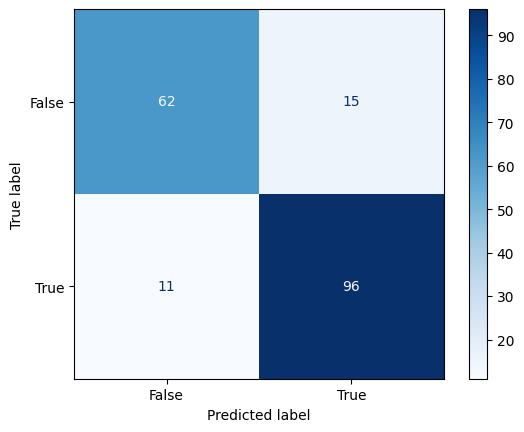

In [24]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, display_labels=["False", "True"], cmap=plt.cm.Blues)

plt.show()

### Evaluation des performances du modèle
Balanced Error Rate (BER) est une mesure de performance qui est utilisée pour évaluer les modèles de classification binaire.
Accuracy signifie le nombre de prédictions correctes faites par le modèle sur toutes les prédictions.
Precision est la proportion de prédictions positives qui sont correctes.
Recall est la proportion de vrais positifs qui sont correctement identifiés.
F1 Score est la moyenne harmonique de la précision et du rappel.
AUC Score est la mesure de la capacité d'un modèle à distinguer entre les classes positives et négatives.
La courbe ROC est une courbe de probabilité qui trace le taux de vrais positifs en fonction du taux de faux positifs.

In [25]:
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

BER = 1 - (1/2 * ((TP / (TP + FN)) + (TN / (TN + FP))))

precision = metrics.precision_score(y_test, y_pred, average='macro')

recall = metrics.recall_score(y_test, y_pred, average='macro')

f1_score = metrics.f1_score(y_test, y_pred, average='macro')

accuracy = metrics.accuracy_score(y_test, y_pred)

auc_score = metrics.roc_auc_score(y_test, y_pred)

print('Balanced Error Rate: ', BER)
print('Accuracy:            ', accuracy)
print('Precision:           ', precision)
print('Recall:              ', recall)
print('F1 Score:            ', f1_score)
print('AUC Score:           ', auc_score)

Balanced Error Rate:  0.14291003332099228
Accuracy:             0.8586956521739131
Precision:            0.8570899666790077
Recall:               0.8511955334385242
F1 Score:             0.8537003058103976
AUC Score:            0.8511955334385242


### Courbe ROC

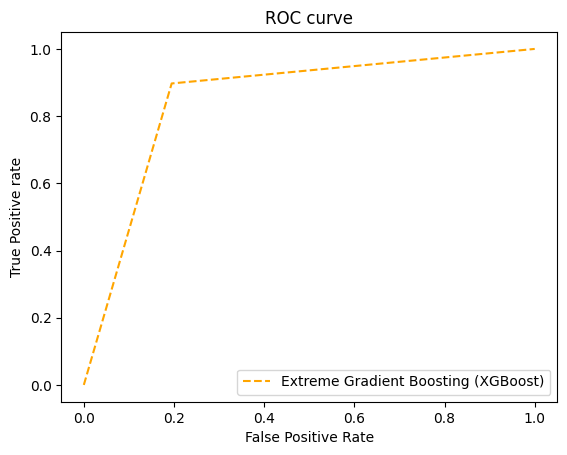

In [26]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred, pos_label=1)

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Extreme Gradient Boosting (XGBoost)')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

# References:
Introduction to Boosted Trees — xgboost 2.0.2 documentation. https://xgboost.readthedocs.io/en/stable/tutorials/model.html

Chen T, Guestrin C, University of Washington. XGBoost: A Scalable Tree Boosting System. 3rd ed.; 2016. https://arxiv.org/pdf/1603.02754.pdf

Keany E. What makes “XGBoost” so Extreme? - Analytics Vidhya - Medium. Medium. https://medium.com/analytics-vidhya/what-makes-xgboost-so-extreme-e1544a4433bb. Published December 13, 2021.

Brownlee J. A gentle introduction to the gradient boosting algorithm for machine learning. MachineLearningMastery.com. Published August 14, 2020. https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning

Zopluoglu C. Cengiz Zopluoglu: How does Extreme Gradient Boosting (XGBOOST) work? Cengiz Zopluoglu. Published January 15, 2019. https://cengiz.me/posts/extreme-gradient-boosting

What is XGBoost? NVIDIA Data Science Glossary. https://www.nvidia.com/en-us/glossary/data-science/xgboost

Medium. https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7

Ar. Basics of Feature Selection with Python. Kaggle. Published October 31, 2020. https://www.kaggle.com/code/ar2017/basics-of-feature-selection-with-python

Bbloggsbott. Feature selection - correlation and P-value. Kaggle. Published April 25, 2022. https://www.kaggle.com/code/bbloggsbott/feature-selection-correlation-and-p-value

Heart Failure Prediction Dataset. Kaggle. Published September 10, 2021. https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction